In [1]:
%config InlineBackend_figure.format = 'svg'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

***Задание 1***

Импортируйте библиотеки pandas, numpy и matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [7]:
y = pd.DataFrame(boston.target, columns=['Цена'])

In [8]:
y.head(2)

,Цена
0,24.0
1,21.6


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [17]:
tsne_trained = tsne.fit_transform(X_train_scaled)

Text(0.5, 1.0, 'Диаграмма рассеяния данных boston.data')

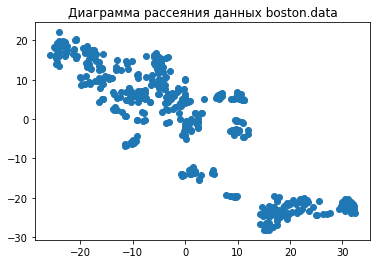

In [18]:
plt.scatter(tsne_trained[:,0], tsne_trained[:,1]);
plt.title('Диаграмма рассеяния данных boston.data')

***Задание 2***

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [21]:
labels = kmeans.fit_predict(X_train_scaled)

In [22]:
pd.value_counts(labels)

0    191
1    128
2     85
dtype: int64

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

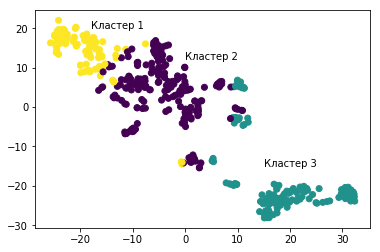

In [23]:
plt.scatter(tsne_trained[:,0], tsne_trained[:,1], c=labels);
plt.text(-18, 20, 'Кластер 1')
plt.text(0, 12, 'Кластер 2')
plt.text(15, -15, 'Кластер 3');

Вычислите средние значения price и CRIM в разных кластерах.

In [24]:
mean_CRIM=[]
for i in np.unique(labels):
    mean_CRIM.append(X_train.loc[labels==i, 'CRIM'].mean())

In [25]:
for index, item in dict(zip(np.unique(labels), mean_CRIM)).items():
    print('{}{}{}{}{}'.format('Кластер ', index+1, ': ', 'средняя преступность - ', round(item,2)))

Кластер 1: средняя преступность - 0.42
Кластер 2: средняя преступность - 10.64
Кластер 3: средняя преступность - 0.07


In [26]:
mean_price = []
for i in np.unique(labels):
    mean_price.append(y_train.loc[labels==i,'Цена'].mean())

In [27]:
for index, item in dict(zip(np.unique(labels),mean_price)).items():
    print('{}{}{}{}{}'.format('Кластер ', index+1,': ','средняя цена - ', np.round(item,2)))

Кластер 1: средняя цена - 24.97
Кластер 2: средняя цена - 16.18
Кластер 3: средняя цена - 27.87


***Задание 3***

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [28]:
test_labels = kmeans.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [29]:
pd.value_counts(test_labels)

0    51
1    35
2    16
dtype: int64

In [30]:
test_CRIM = []
for item in np.unique(test_labels):
    test_CRIM.append(X_test.loc[test_labels==item, 'CRIM'].mean())

In [31]:
dict(zip(np.unique(test_labels), test_CRIM))

{0: 0.2660788235294118, 1: 10.165531142857143, 2: 0.06206}

In [32]:
for index, item in dict(zip(np.unique(test_labels), test_CRIM)).items():
    print('{}{}{}{}{}'.format('Кластер ', index+1, ': ', 'средняя преступность - ', round(item,2)))

Кластер 1: средняя преступность - 0.27
Кластер 2: средняя преступность - 10.17
Кластер 3: средняя преступность - 0.06


In [33]:
test_price = []
for item in np.unique(test_labels):
    test_price.append(y_test.loc[test_labels==item,'Цена'].mean())

In [34]:
for index, item in dict(zip(np.unique(test_labels),np.round(test_price, 2))).items():
    print('{}{}{}{}{}'.format('Кластер ', index+1, ':  ', 'средняя цена - ', item))

Кластер 1:  средняя цена - 21.86
Кластер 2:  средняя цена - 16.44
Кластер 3:  средняя цена - 31.35
